# Reinforcement Learning Final Project 

Welcome to your Reinforcement Learning project focused on developing an RL agent capable of playing chess at a strategic level. Chess has long been considered a benchmark for measuring AI capabilities, and this project aims to leverage the power of RL to create an intelligent agent that can make optimal decisions in complex chess positions. By combining the principles of reinforcement learning with the rich strategic domain of chess, you will explore new approaches to create the most effective chess player.

## Project Objectives:

* Train an RL agent to play chess: The primary objective of this project is to develop an RL agent that can play chess at a high level of proficiency. The agent should be capable of evaluating chess positions and making strategic decisions.

* Optimize decision-making using RL algorithms: Explore different RL algorithms, as seen in class, to train the agent. Compare and analise their effectiveness in learning and decision-making capabilities in the context of chess.

* Use a challenging chess environment: Use a comprehensive environment for the agent to interact with, representing the rules and dynamics of chess. This environment will provide a realistic and challenging setting for the agent's training and evaluation.

* Evaluate and benchmark performance: Assess the performance of the RL agent against different benchmarks from existing chess engines. You will compare your agent's performance to established chess engines to measure progress and identify areas for improvement.


### Extra Objectives:

* Investigate transfer learning and generalization: Explore techniques for transfer learning to leverage knowledge acquired in related domains or from pre-training on large chess datasets. Investigate the agent's ability to generalize its knowledge.

* Enhance interpretability and analysis: Develop methods to analise the agent's decision-making process and provide insights into its strategic thinking. Investigate techniques to visualize the agent's evaluation of chess positions and understand its reasoning behind specific moves.

## Let's Play Chess! 

As you know [Chess](https://en.wikipedia.org/wiki/Chess) is a board game for two players, called White and Black, each controlling an army of chess pieces in their color, with the objective to checkmate the opponent's king.

Chess is an abstract strategy game that involves no hidden information and no use of dice or cards. It is played on a chessboard with 64 squares arranged in an eight-by-eight grid. At the start, each player controls sixteen pieces: one king, one queen, two rooks, two bishops, two knights, and eight pawns. White moves first, followed by Black. Checkmating the opponent's king involves putting the king under immediate attack (in "check") whereby there is no way for it to escape.


![](Images/CHESS_MOVES.PNG)

* The king moves one square in any direction. There is also a special move called castling that involves moving the king and a rook. The king is the most valuable piece — attacks on the king must be immediately countered, and if this is impossible, the game is immediately lost.
* A rook can move any number of squares along a rank or file, but cannot leap over other pieces. Along with the king, a rook is involved during the king's castling move.
* A bishop can move any number of squares diagonally, but cannot leap over other pieces.
* A queen combines the power of a rook and bishop and can move any number of squares along a rank, file, or diagonal, but cannot leap over other pieces.
* A knight moves to any of the closest squares that are not on the same rank, file, or diagonal. (Thus the move forms an "L"-shape: two squares vertically and one square horizontally, or two squares horizontally and one square vertically.) The knight is the only piece that can leap over other pieces.
* A pawn can move forward to the unoccupied square immediately in front of it on the same file, or on its first move it can advance two squares along the same file, provided both squares are unoccupied (black dots in the diagram). A pawn can capture an opponent's piece on a square diagonally in front of it by moving to that square (black crosses). It cannot capture a piece while advancing along the same file. A pawn has two special moves: the en passant capture and promotion.

## The [Environment](https://github.com/iamlucaswolf/gym-chess)

The environment gym-chess provides OpenAI Gym environments for the game of Chess. It comes with an implementation of the board and move encoding used in AlphaZero. 

Please install it using the command: 

`pip install gym-chess`

In [422]:
#pip install gym-chess

In [1]:
import chess
#import gym
import gym_chess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
import random
import gymnasium as gym
#import numpy as np
from collections import deque
#import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

import cv2

import time
from tqdm.notebook import tqdm
from moviepy.editor import ImageSequenceClip
from IPython.display import clear_output

### A Two player's game

As you know chess is played by two players, as such the gym-chess environment gives you access to both players actions in a sequential matter.

In [424]:
def WHITE_PLAYER_POLICY(env, state):
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)

    return action


def BLACK_PLAYER_POLICY(env, state):
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)

    return action

In [425]:
env = gym.make(
    "ChessAlphaZero-v0"
)  # We will use Alpha Zero's numenclature for the actions encodings

state = env.reset()
done = False
counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

while not done:
    if (
        counter % 2 == 0
    ):  # If the step number is even, this means that it is the WHITE player's turn
        action = WHITE_PLAYER_POLICY(env, state)
        next_state, reward, done, info = env.step(action)

    else:  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
        action = BLACK_PLAYER_POLICY(env, state)
        next_state, reward, done, info = env.step(action)

    counter += 1

print(reward)

env.close()

0.0


#### The agent receives a reward of +1 when the white player makes a winning move, and a reward of -1 when the black player makes a winning move. 

All other rewards are zero.

### Evaluationg your agent with [Stockfish](https://github.com/zhelyabuzhsky/stockfish)

In order to have a good enough idea that our agent is actually playing well we need a benchmarkable opponent.

As such we need to install stockfish a free and open-source chess engine. Stockfish has consistently ranked first or near the top of most chess-engine rating lists and, as of April 2023, is the strongest CPU chess engine in the world.

`pip install stockfish`


In [409]:
pip install stockfish

Note: you may need to restart the kernel to use updated packages.


In [410]:
pip show numpy

Name: numpy
Version: 1.23.4
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: c:\users\isabe\anaconda3\envs\week5\lib\site-packages
Requires: 
Required-by: ale-py, contourpy, gym, gymnasium, h5py, imageio, jax, jax-jumpy, Keras-Applications, Keras-Preprocessing, matplotlib, ml-dtypes, moviepy, mujoco, mujoco-py, opencv-python, opt-einsum, pandas, scikit-learn, scipy, seaborn, tensorboard, tensorflow-intel, torchtext
Note: you may need to restart the kernel to use updated packages.


In [3]:
from stockfish import Stockfish

StockFish has a python api as seen above, nevertheless the engine still needs to be downloaded [here](https://stockfishchess.org/download/) and used in the path.

NOTE: You were given an engine already in moodle, nevertheless different computer systems (Windows, Mac, Ubuntu) might require other Stockfish engines.

In [4]:
Stockfish_path = "C:/Users/isabe/Desktop/RL/Project/stockfish_15.1_win_x64_avx2/stockfish-windows-2022-x86-64-avx2"

The functions bellow generate episodes/games for a WHITE or BLACK Pieces Scenario respectively. We store the outcome of the episode (win/draw/loss) and the number of steps taken.

#### Notice how the AGENT_POLICY function is used it recieves as inputs the env and the current state.
`action = AGENT_POLICY(env, state)`

In [413]:
def generate_WHITE_scenario(Stockfish_path, AGENT_POLICY):
    env = gym.make(
        "ChessAlphaZero-v0"
    )  # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system

    state = env.reset()
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

    while not done:
        if (
            counter % 2 == 0
        ):  # If the step number is pair, this means that it is the WHITE player's turn
            action = AGENT_POLICY(env, state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        else:  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        counter += 1

    env.close()

    return reward, np.ceil(counter / 2)


def generate_BLACK_scenario(Stockfish_path, AGENT_POLICY):
    env = gym.make(
        "ChessAlphaZero-v0"
    )  # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system

    state = env.reset()
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

    while not done:
        if (
            counter % 2 == 1
        ):  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
            action = AGENT_POLICY(env, state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        else:  # If the step number is even, this means that it is the WHITE player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        counter += 1

    env.close()

    return reward, np.ceil(counter / 2)

In the function bellow a visualization is produced from the bechmarks made.

In [414]:
def AGENT_EVALUATION(Stockfish_path, WHITE_PLAYER_POLICY, BLACK_PLAYER_POLICY, n_evaluations=100): #changed
    results_list = []

    for evaluation_number in tqdm(range(n_evaluations)):
        generate_episode = generate_WHITE_scenario

        reward, n_steps = generate_episode(Stockfish_path, WHITE_PLAYER_POLICY) #changed

        if reward == 1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["WHITE", result, n_steps])

        generate_episode = generate_BLACK_scenario

        reward, n_steps = generate_episode(Stockfish_path, BLACK_PLAYER_POLICY) #changed

        if reward == -1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["BLACK", result, n_steps])

    df = pd.DataFrame(
        results_list, columns=["AGENT COLOR", "OUTCOME", "N STEPS"]
    ).astype("int", errors="ignore")

    plt.style.use("fivethirtyeight")

    results_group = (
        df.groupby(["AGENT COLOR", "OUTCOME"])
        .count()
        .rename(columns={"N STEPS": "GAMES"})
    )

    n_games = results_group.sum()[0]

    results_group = (2 * 100 * results_group / (n_games)).astype("int")

    viz_df = (
        results_group.reset_index()
        .pivot_table(index="AGENT COLOR", columns="OUTCOME", values="GAMES")
        .fillna(0)
    )

    viz_df.plot(kind="barh", stacked=True)

    plt.xlabel("Percentage")
    plt.title(f"EVALUATION RESULTS FOR {n_games} GAMES")

    plt.show()

    return df

  0%|          | 0/5 [00:00<?, ?it/s]

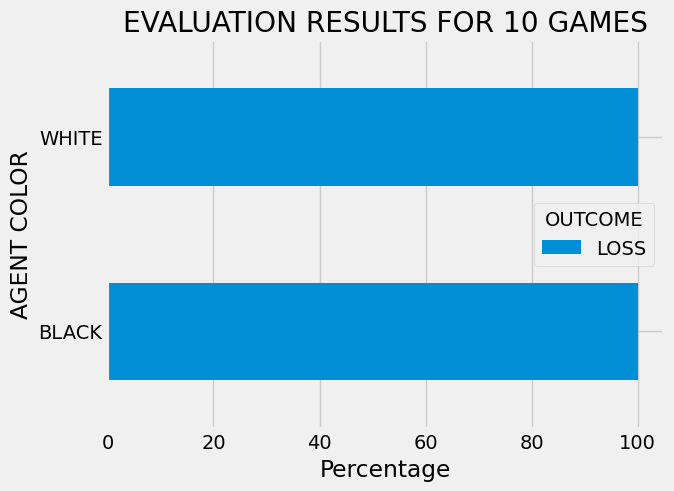

In [415]:
df = AGENT_EVALUATION(Stockfish_path, WHITE_PLAYER_POLICY, BLACK_PLAYER_POLICY, n_evaluations=5) #changed

In [12]:
df.head(5)

,AGENT COLOR,OUTCOME,N STEPS
0,WHITE,LOSS,28
1,BLACK,LOSS,7
2,WHITE,LOSS,11
3,BLACK,LOSS,27
4,WHITE,LOSS,19


# Ready to Play Chess?

In [5]:
def preprocess_state(state):
    state_boards= np.c_[state[:,:,:14], state[:,:,-7:]] #the state we want just has the current board and the last matrices with information
    return np.array([state_boards.reshape(8,8,21)])

In [6]:
state= env.reset()
state_p=preprocess_state(state)

state_p.shape 

NameError: name 'env' is not defined

Define the Deep Q-Network (DQN) model architecture using a neural network framework like TensorFlow. The model takes the state as input and outputs Q-values for each action.

In [202]:
class DQN_WHITE:
    def __init__(self, state_size, env):
        #define environment
        self.env= env

        #define the state size
        self.state_size = state_size
        
        #define the action size
        self.action_size = len(env.legal_actions)

        #define legal actions
        self.legal_actions = env.legal_actions
        
        #define the replay buffer
        self.replay_buffer = deque(maxlen=1000)
        
        #define the discount factor
        self.gamma = 0.9
        
        #define the epsilon value
        self.epsilon = 0.99
        
        #define the update rate at which we want to update the target network
        self.update_rate = 5
        
        #define the main network
        self.main_network = self.build_network()
        
        #define the target network
        self.target_network = self.build_network()
        
        #copy the weights of the main network to the target network
        self.target_network.set_weights(self.main_network.get_weights())

        #learning rate
        self.learning_rate = .0001
        

    #Let's define a function called build_network which is essentially our DQN. 

    def build_network(self):
        model = Sequential()
        model.add(Conv2D(filters=6, kernel_size=(7, 7), strides=1, activation='relu', padding='same', input_shape=self.state_size))
        model.add(Conv2D(filters=6, kernel_size=(3, 3), strides=2, activation='relu', padding='same'))
        model.add(Conv2D(filters=12, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
        model.add(Conv2D(filters=12, kernel_size=(3, 3), strides=2, activation='relu', padding='same'))
        model.add(Flatten())
        model.add(Dense(216, activation='relu'))
        model.add(Dense(self.env.action_space.n, activation=None))

        model.compile(loss='mse', optimizer=Adam(learning_rate=.0001, epsilon=1e-7))


        return model

    #We learned that we train DQN by randomly sampling a minibatch of transitions from the
    #replay buffer. So, we define a function called store_transition which stores the transition information
    #into the replay buffer

    def store_transition(self, state, action, reward, next_state, done):
        self.replay_buffer.append((state, action, reward, next_state, done))
        

    #We learned that in DQN, to take care of exploration-exploitation trade off, we select action
    #using the epsilon-greedy policy. So, now we define the function called epsilon_greedy
    #for selecting action using the epsilon-greedy policy.
    def epsilon_greedy(self, state):
        if random.uniform(0,1) < self.epsilon:
            #print('random')
            legal_actions = self.env.legal_actions
            action = np.random.choice(legal_actions)
            return action
        print('predict')
        Q_values = self.main_network.predict(state, verbose=0)
        #return np.argmax(Q_values[0])
        max_q_value = float('-inf') #since we want to maximize, we initialize in a very low value
        selected_action = None
        for index, q_value in enumerate(Q_values[0]):
            if self.env.decode(index) in self.legal_actions:
                if q_value>max_q_value:
                    selected_action = index
                    max_q_value = q_value
        return selected_action
    
    #train the network
    def train(self, batch_size):
        
        minibatch = np.array(random.sample(self.replay_buffer, batch_size), dtype=object)

        state_list = np.array(minibatch[:,0], dtype=object)
        state_list = np.hstack(state_list).reshape(batch_size, 8, 8, 21)

        next_state_list = np.array(minibatch[:,3])
        next_state_list = np.hstack(next_state_list).reshape(batch_size, 8, 8, 21)

        current_Q_values_list = self.main_network.predict(state_list, verbose=0)

        max_q = np.amax(self.target_network.predict(next_state_list, verbose=0), axis=1)

        for i, zip_ in enumerate(minibatch):

            state, action, reward, next_state, done = zip_

            if not done:
                target  = reward + self.gamma * max_q[i]
            else:
                target = reward

            updated_Q_value = target # (1 - self.learning_rate)*current_Q_values_list[i][action] + self.learning_rate*(target) # - current_Q_values_list[i][action]) # This is a different form of Q-learning (Min Q-Learning)

            current_Q_values_list[i][action] = updated_Q_value
        #train the main network
        self.main_network.fit(state_list, current_Q_values_list, epochs=1, verbose=0)
            
    #update the target network weights by copying from the main network
    def update_target_network(self):
        self.target_network.set_weights(self.main_network.get_weights())
        

In [203]:
class DQN_BLACK:
    def __init__(self, state_size, env):
        #define environment
        self.env= env

        #define the state size
        self.state_size = state_size
        
        #define the action size
        self.action_size = len(env.legal_actions)

        #define legal actions
        self.legal_actions = env.legal_actions
        
        #define the replay buffer
        self.replay_buffer = deque(maxlen=1000)
        
        #define the discount factor
        self.gamma = 0.9
        
        #define the epsilon value
        self.epsilon = 0.99
        
        #define the update rate at which we want to update the target network
        self.update_rate = 5
        
        #define the main network
        self.main_network = self.build_network()
        
        #define the target network
        self.target_network = self.build_network()
        
        #copy the weights of the main network to the target network
        self.target_network.set_weights(self.main_network.get_weights())

        #learning rate
        self.learning_rate = .0001
        

    #Let's define a function called build_network which is essentially our DQN. 

    def build_network(self):
        model = Sequential()
        model.add(Conv2D(filters=6, kernel_size=(7, 7), strides=1, activation='relu', padding='same', input_shape=self.state_size))
        model.add(Conv2D(filters=6, kernel_size=(3, 3), strides=2, activation='relu', padding='same'))
        model.add(Conv2D(filters=12, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
        model.add(Conv2D(filters=12, kernel_size=(3, 3), strides=2, activation='relu', padding='same'))
        model.add(Flatten())
        model.add(Dense(216, activation='relu'))
        model.add(Dense(self.env.action_space.n, activation=None))

        model.compile(loss='mse', optimizer=Adam(learning_rate=.0001, epsilon=1e-7))


        return model

    #We learned that we train DQN by randomly sampling a minibatch of transitions from the
    #replay buffer. So, we define a function called store_transition which stores the transition information
    #into the replay buffer

    def store_transition(self, state, action, reward, next_state, done):
        self.replay_buffer.append((state, action, reward, next_state, done))
        

    #We learned that in DQN, to take care of exploration-exploitation trade off, we select action
    #using the epsilon-greedy policy. So, now we define the function called epsilon_greedy
    #for selecting action using the epsilon-greedy policy.
    def epsilon_greedy(self, state):
        if random.uniform(0,1) < self.epsilon:
            #print('random')
            legal_actions = self.env.legal_actions
            action = np.random.choice(legal_actions)
            return action
        print('predict')
        Q_values = self.main_network.predict(state, verbose=0)
        #return np.argmax(Q_values[0])
        max_q_value = float('-inf') #since we want to maximize, we initialize in a very low value
        selected_action = None
        for index, q_value in enumerate(Q_values[0]):
            if self.env.decode(index) in self.legal_actions:
                if q_value>max_q_value:
                    selected_action = index
                    max_q_value = q_value
        return selected_action
    
    #train the network
    def train(self, batch_size):
        
        minibatch = np.array(random.sample(self.replay_buffer, batch_size), dtype=object)

        state_list = np.array(minibatch[:,0], dtype=object)
        state_list = np.hstack(state_list).reshape(batch_size, 8, 8, 21)

        next_state_list = np.array(minibatch[:,3])
        next_state_list = np.hstack(next_state_list).reshape(batch_size, 8, 8, 21)

        current_Q_values_list = self.main_network.predict(state_list, verbose=0)

        max_q = np.amax(self.target_network.predict(next_state_list, verbose=0), axis=1)

        for i, zip_ in enumerate(minibatch):

            state, action, reward, next_state, done = zip_

            if not done:
                target  = reward + self.gamma * max_q[i]
            else:
                target = reward

            updated_Q_value = target # (1 - self.learning_rate)*current_Q_values_list[i][action] + self.learning_rate*(target) # - current_Q_values_list[i][action]) # This is a different form of Q-learning (Min Q-Learning)

            current_Q_values_list[i][action] = updated_Q_value
        #train the main network
        self.main_network.fit(state_list, current_Q_values_list, epochs=1, verbose=0)
            
    #update the target network weights by copying from the main network
    def update_target_network(self):
        self.target_network.set_weights(self.main_network.get_weights())

## Train Network

In [204]:
#trying BoltzmannQPolicy
def WHITE_BoltzmannQPolicy(env, state):
    policy= BoltzmannQPolicy(temperature=1.0)
    q_values = model_white.predict(state)
    return policy.select_action(q_values)

def BLACK_BoltzmannQPolicy(env, state):
    policy= BoltzmannQPolicy(temperature=1.0)
    q_values = model_white.predict(state)
    return policy.select_action(q_values)

In [205]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [206]:
def generate_WHITE_scenario(Stockfish_path, dqn_white, evaluation_number):
    env = gym.make("ChessAlphaZero-v0") # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system
    
    #pre-process state
    dqn_white.state = env.reset()
    dqn_white.env= env
    dqn_white.state = preprocess_state(dqn_white.state)
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game
    # set return to 0
    Return = 0 
    Real_Return = 0

    while not done:
        if (
            counter % 2 == 0
        ):  # If the step number is even, this means that it is the WHITE player's turn
            
            #Update target model if the correct nº episodes has passed
            if evaluation_number % dqn_white.update_rate == 0:
                dqn_white.update_target_network()

            # Select action to perform   
            action = dqn_white.epsilon_greedy(dqn_white.state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])

            # Perform selected action
            next_state, reward, done, info = env.step(action)
            real_reward= reward

            # Reward full trotle?
            #if env.decode(action)[1]>0:
            #    reward *= 1.5

            #pre-process next state
            next_state = preprocess_state(next_state)
            
            #update values in dqn class
            dqn_white.env= env
            dqn_white.legal_actions = env.legal_actions

            #store the transition information
            dqn_white.store_transition(dqn_white.state, action, reward, next_state, done)

            #update current state to next state
            dqn_white.state = next_state

            #update the return
            Return += reward
            Real_Return += real_reward

            #TODO Step: if continually getting negative reward, stop

            #print return if episode finished
            if done:
                print('Episode: ',i, ', Return:', round(Return), 'Steps:', counter, 'Epsilon:', round(dqn_white.epsilon,2), '\n')
                break

            #if nº transitions in replay_buffer>batch_size
            if (len(dqn_white.replay_buffer) > batch_size) & (counter/2 % 10 == 0): # Only train each 10 steps that the agent plays
                dqn_white.train(batch_size)


        else:  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        counter += 1

    env.close()

    return reward, np.ceil(counter / 2)


def generate_BLACK_scenario(Stockfish_path, dqn_black, evaluation_number):
    env = gym.make("ChessAlphaZero-v0") # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system
    
    #pre-process state
    dqn_black.state = env.reset()
    dqn_black.env= env
    dqn_black.state = preprocess_state(dqn_black.state)
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game
    # set return to 0
    Return = 0 
    Real_Return = 0

    while not done:
        if (
            counter % 2 == 1
        ):  # If the step number is even, this means that it is the WHITE player's turn
            
            #Update target model if the correct nº episodes has passed
            if evaluation_number % dqn_black.update_rate == 0:
                dqn_black.update_target_network()

            # Select action to perform   
            action = dqn_black.epsilon_greedy(dqn_black.state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])

            # Perform selected action
            next_state, reward, done, info = env.step(action)
            real_reward= reward

            # Reward full trotle?
            #if env.decode(action)[1]>0:
            #    reward *= 1.5

            #pre-process next state
            next_state = preprocess_state(next_state)
            
            #update values in dqn class
            dqn_black.env= env
            dqn_black.legal_actions = env.legal_actions

            #store the transition information
            dqn_black.store_transition(dqn_black.state, action, reward, next_state, done)

            #update current state to next state
            dqn_black.state = next_state

            #update the return
            Return += reward
            Real_Return += real_reward

            #TODO Step: if continually getting negative reward, stop

            #print return if episode finished
            if done:
                print('Episode: ',i, ', Return:', round(Return), 'Steps:', counter, 'Epsilon:', round(dqn_black.epsilon,2), '\n')
                break

            #if nº transitions in replay_buffer>batch_size
            if (len(dqn_black.replay_buffer) > batch_size) & (counter/2 % 10 == 0): # Only train each 10 steps that the agent plays
                dqn_black.train(batch_size)


        else:  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        counter += 1

    env.close()

    return reward, np.ceil(counter / 2)

In [207]:
def AGENT_EVALUATION(Stockfish_path, n_evaluations=100): #changed
    results_list = []
    env= gym.make("ChessAlphaZero-v0")
    env.reset()
    dqn_white= DQN_WHITE((8, 8, 21), env)
    dqn_black= DQN_BLACK((8, 8, 21), env)
    for evaluation_number in tqdm(range(n_evaluations)):
        print('in white scenario')
        generate_episode = generate_WHITE_scenario
        reward, n_steps = generate_episode(Stockfish_path, dqn_white, evaluation_number) #changed

        if reward == 1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["WHITE", result, n_steps])
        
        #update the epsilon
        dqn_white.epsilon -= .005 # dqn.epsilon/num_episodes
        dqn_white.epsilon = max(dqn_white.epsilon, 0.2) 

        print('in black scenario')
        generate_episode = generate_BLACK_scenario

        reward, n_steps = generate_episode(Stockfish_path, dqn_black, evaluation_number) #changed

        if reward == -1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["BLACK", result, n_steps])

        #update the epsilon
        dqn_black.epsilon -= .005 # dqn.epsilon/num_episodes
        dqn_black.epsilon = max(dqn_black.epsilon, 0.2) 
        

    df = pd.DataFrame(
        results_list, columns=["AGENT COLOR", "OUTCOME", "N STEPS"]
    ).astype("int", errors="ignore")

    plt.style.use("fivethirtyeight")

    results_group = (
        df.groupby(["AGENT COLOR", "OUTCOME"])
        .count()
        .rename(columns={"N STEPS": "GAMES"})
    )

    n_games = results_group.sum()[0]

    results_group = (2 * 100 * results_group / (n_games)).astype("int")

    viz_df = (
        results_group.reset_index()
        .pivot_table(index="AGENT COLOR", columns="OUTCOME", values="GAMES")
        .fillna(0)
    )

    viz_df.plot(kind="barh", stacked=True)

    plt.xlabel("Percentage")
    plt.title(f"EVALUATION RESULTS FOR {n_games} GAMES")

    plt.show()

    return df

In [208]:
import gym
import gym_chess

In [209]:
#number of episodes
num_episodes = 20#00

# Define the batch size:
batch_size = 32 #128

df = AGENT_EVALUATION(Stockfish_path, n_evaluations=num_episodes) #changed

  0%|          | 0/20 [00:00<?, ?it/s]

in white scenario
in black scenario
in white scenario
in black scenario
in white scenario
predict


AttributeError: 'NoneType' object has no attribute 'piece_type'

In [ ]:
import chess.pgn
import io

pgn = open("C:/Users/isabe/Desktop/RL/Project/alphazero_stockfish_all/alphazero_vs_stockfish_all.pgn")

train_df=[]

for i in range(110):
    game=chess.pgn.read_game(pgn)
    # Process the moves, positions in board, rewards and outcome in the game
    moves = []
    positions = []
    rewards = []
    outcome = game.headers["Result"]
    if game.headers["White"]== "AlphaZero":
        color= "white"
    else:
        color= "black"

    board = game.board()
    for move in game.mainline_moves():
        board.push(move)
        moves.append(move)
        positions.append(board.fen())  # Save board position
        
    game_data = {
        "moves": moves,
        "positions": positions,
        "player_color": color,
        "outcome": outcome
    }

    train_df.append(game_data)



In [52]:
train_df = pd.DataFrame(train_df)
train_df.head()

,moves,positions,player_color,outcome
0,"[g1f3, g8f6, c2c4, e7e6, b1c3, f8b4, d1c2, e8g...",[rnbqkbnr/pppppppp/8/8/8/5N2/PPPPPPPP/RNBQKB1R...,white,1-0
1,"[d2d4, g8f6, c2c4, e7e6, g1f3, b7b6, g2g3, c8b...",[rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...,white,1-0
2,"[d2d4, g8f6, c2c4, e7e6, g1f3, b7b6, g2g3, c8b...",[rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...,white,1-0
3,"[g1f3, e7e6, c2c4, g8f6, b1c3, f8b4, d1c2, e8g...",[rnbqkbnr/pppppppp/8/8/8/5N2/PPPPPPPP/RNBQKB1R...,white,1-0
4,"[d2d4, g8f6, g1f3, e7e6, c2c4, b7b6, g2g3, c8b...",[rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...,white,1-0


# Tentativa YouTube

In [ ]:
from keras.model import Sequential()
from keras.layers import Dense, Dropout, COnv2D, MaxPooling, Activation, Flatten
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
from collections import deque
from keras.callbacks import TensorBoard

In [12]:
import numpy as np
from tensorflow.python.keras.backend import set_session 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Activation, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import tensorflow as tf
from collections import deque
import time
import random
from tqdm import tqdm
import os
from PIL import Image
import cv2


DISCOUNT = 0.99
REPLAY_MEMORY_SIZE = 50_000  # How many last steps to keep for model training
MIN_REPLAY_MEMORY_SIZE = 1_000  # Minimum number of steps in a memory to start training
MINIBATCH_SIZE = 64  # How many steps (samples) to use for training
UPDATE_TARGET_EVERY = 5  # Terminal states (end of episodes)
MODEL_NAME = '2x256'
MIN_REWARD = -200  # For model save
MEMORY_FRACTION = 0.20

# Environment settings
EPISODES = 20_000

# Exploration settings
epsilon = 1  # not a constant, going to be decayed
EPSILON_DECAY = 0.99975
MIN_EPSILON = 0.001

#  Stats settings
AGGREGATE_STATS_EVERY = 50  # episodes
SHOW_PREVIEW = False


class Blob:
    def __init__(self, size):
        self.size = size
        self.x = np.random.randint(0, size)
        self.y = np.random.randint(0, size)

    def __str__(self):
        return f"Blob ({self.x}, {self.y})"

    def __sub__(self, other):
        return (self.x-other.x, self.y-other.y)

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

    def action(self, choice):
        '''
        Gives us 9 total movement options. (0,1,2,3,4,5,6,7,8)
        '''
        if choice == 0:
            self.move(x=1, y=1)
        elif choice == 1:
            self.move(x=-1, y=-1)
        elif choice == 2:
            self.move(x=-1, y=1)
        elif choice == 3:
            self.move(x=1, y=-1)

        elif choice == 4:
            self.move(x=1, y=0)
        elif choice == 5:
            self.move(x=-1, y=0)

        elif choice == 6:
            self.move(x=0, y=1)
        elif choice == 7:
            self.move(x=0, y=-1)

        elif choice == 8:
            self.move(x=0, y=0)

    def move(self, x=False, y=False):

        # If no value for x, move randomly
        if not x:
            self.x += np.random.randint(-1, 2)
        else:
            self.x += x

        # If no value for y, move randomly
        if not y:
            self.y += np.random.randint(-1, 2)
        else:
            self.y += y

        # If we are out of bounds, fix!
        if self.x < 0:
            self.x = 0
        elif self.x > self.size-1:
            self.x = self.size-1
        if self.y < 0:
            self.y = 0
        elif self.y > self.size-1:
            self.y = self.size-1


class BlobEnv:
    SIZE = 10
    RETURN_IMAGES = True
    MOVE_PENALTY = 1
    ENEMY_PENALTY = 300
    FOOD_REWARD = 25
    OBSERVATION_SPACE_VALUES = (SIZE, SIZE, 3)  # 4
    ACTION_SPACE_SIZE = 9
    PLAYER_N = 1  # player key in dict
    FOOD_N = 2  # food key in dict
    ENEMY_N = 3  # enemy key in dict
    # the dict! (colors)
    d = {1: (255, 175, 0),
         2: (0, 255, 0),
         3: (0, 0, 255)}

    def reset(self):
        self.player = Blob(self.SIZE)
        self.food = Blob(self.SIZE)
        while self.food == self.player:
            self.food = Blob(self.SIZE)
        self.enemy = Blob(self.SIZE)
        while self.enemy == self.player or self.enemy == self.food:
            self.enemy = Blob(self.SIZE)

        self.episode_step = 0

        if self.RETURN_IMAGES:
            observation = np.array(self.get_image())
        else:
            observation = (self.player-self.food) + (self.player-self.enemy)
        return observation

    def step(self, action):
        self.episode_step += 1
        self.player.action(action)

        #### MAYBE ###
        #enemy.move()
        #food.move()
        ##############

        if self.RETURN_IMAGES:
            new_observation = np.array(self.get_image())
        else:
            new_observation = (self.player-self.food) + (self.player-self.enemy)

        if self.player == self.enemy:
            reward = -self.ENEMY_PENALTY
        elif self.player == self.food:
            reward = self.FOOD_REWARD
        else:
            reward = -self.MOVE_PENALTY

        done = False
        if reward == self.FOOD_REWARD or reward == -self.ENEMY_PENALTY or self.episode_step >= 200:
            done = True

        return new_observation, reward, done

    def render(self):
        img = self.get_image()
        img = img.resize((300, 300))  # resizing so we can see our agent in all its glory.
        cv2.imshow("image", np.array(img))  # show it!
        cv2.waitKey(1)

    # FOR CNN #
    def get_image(self):
        env = np.zeros((self.SIZE, self.SIZE, 3), dtype=np.uint8)  # starts an rbg of our size
        env[self.food.x][self.food.y] = self.d[self.FOOD_N]  # sets the food location tile to green color
        env[self.enemy.x][self.enemy.y] = self.d[self.ENEMY_N]  # sets the enemy location to red
        env[self.player.x][self.player.y] = self.d[self.PLAYER_N]  # sets the player tile to blue
        img = Image.fromarray(env, 'RGB')  # reading to rgb. Apparently. Even tho color definitions are bgr. ???
        return img


env = BlobEnv()

# For stats
ep_rewards = [-200]

# For more repetitive results
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# Memory fraction, used mostly when trai8ning multiple agents
#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=MEMORY_FRACTION)
#backend.set_session(tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)))

# Create models folder
if not os.path.isdir('models'):
    os.makedirs('models')


# Own Tensorboard class
class ModifiedTensorBoard(TensorBoard):

    # Overriding init to set initial step and writer (we want one log file for all .fit() calls)
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.step = 1
        self.writer =tf.summary.create_file_writer(self.log_dir) #tf.summary.FileWriter(self.log_dir)

    # Overriding this method to stop creating default log writer
    def set_model(self, model):
        pass

    # Overrided, saves logs with our step number
    # (otherwise every .fit() will start writing from 0th step)
    def on_epoch_end(self, epoch, logs=None):
        self.update_stats(**logs)

    # Overrided
    # We train for one batch only, no need to save anything at epoch end
    def on_batch_end(self, batch, logs=None):
        pass

    # Overrided, so won't close writer
    def on_train_end(self, _):
        pass

    # Custom method for saving own metrics
    # Creates writer, writes custom metrics and closes writer
    def update_stats(self, **stats):
        self._write_logs(stats, self.step)

    def _write_logs(self, logs, index):
        with self.writer.as_default():
            for name, value in logs.items():
                tf.summary.scalar(name, value, step=index)
                self.step += 1
                self.writer.flush()

# Agent class
class DQNAgent:
    def __init__(self):

        # Main model
        self.model = self.create_model()

        # Target network
        self.target_model = self.create_model()
        self.target_model.set_weights(self.model.get_weights())

        # An array with last n steps for training
        self.replay_memory = deque(maxlen=REPLAY_MEMORY_SIZE)

        # Custom tensorboard object
        self.tensorboard = ModifiedTensorBoard(log_dir="logs/{}-{}".format(MODEL_NAME, int(time.time())))

        # Used to count when to update target network with main network's weights
        self.target_update_counter = 0

    def create_model(self):
        model = Sequential()

        model.add(Conv2D(256, (3, 3), input_shape=env.OBSERVATION_SPACE_VALUES))  # OBSERVATION_SPACE_VALUES = (10, 10, 3) a 10x10 RGB image.
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))

        model.add(Conv2D(256, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))

        model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
        model.add(Dense(64))

        model.add(Dense(env.ACTION_SPACE_SIZE, activation='linear'))  # ACTION_SPACE_SIZE = how many choices (9)
        model.compile(loss="mse", optimizer=Adam(lr=0.001), metrics=['accuracy'])
        return model

    # Adds step's data to a memory replay array
    # (observation space, action, reward, new observation space, done)
    def update_replay_memory(self, transition):
        self.replay_memory.append(transition)

    # Trains main network every step during episode
    def train(self, terminal_state, step):

        # Start training only if certain number of samples is already saved
        if len(self.replay_memory) < MIN_REPLAY_MEMORY_SIZE:
            return

        # Get a minibatch of random samples from memory replay table
        minibatch = random.sample(self.replay_memory, MINIBATCH_SIZE)

        # Get current states from minibatch, then query NN model for Q values
        current_states = np.array([transition[0] for transition in minibatch])/255
        current_qs_list = self.model.predict(current_states)

        # Get future states from minibatch, then query NN model for Q values
        # When using target network, query it, otherwise main network should be queried
        new_current_states = np.array([transition[3] for transition in minibatch])/255
        future_qs_list = self.target_model.predict(new_current_states)

        X = []
        y = []

        # Now we need to enumerate our batches
        for index, (current_state, action, reward, new_current_state, done) in enumerate(minibatch):

            # If not a terminal state, get new q from future states, otherwise set it to 0
            # almost like with Q Learning, but we use just part of equation here
            if not done:
                max_future_q = np.max(future_qs_list[index])
                new_q = reward + DISCOUNT * max_future_q
            else:
                new_q = reward

            # Update Q value for given state
            current_qs = current_qs_list[index]
            current_qs[action] = new_q

            # And append to our training data
            X.append(current_state)
            y.append(current_qs)

        # Fit on all samples as one batch, log only on terminal state
        self.model.fit(np.array(X)/255, np.array(y), batch_size=MINIBATCH_SIZE, verbose=0, shuffle=False, callbacks=[self.tensorboard] if terminal_state else None)

        # Update target network counter every episode
        if terminal_state:
            self.target_update_counter += 1

        # If counter reaches set value, update target network with weights of main network
        if self.target_update_counter > UPDATE_TARGET_EVERY:
            self.target_model.set_weights(self.model.get_weights())
            self.target_update_counter = 0

    # Queries main network for Q values given current observation space (environment state)
    def get_qs(self, state):
        return self.model.predict(np.array(state).reshape(-1, *state.shape)/255)[0]


agent = DQNAgent()

# Iterate over episodes
for episode in tqdm(range(1, EPISODES + 1), ascii=True, unit='episodes'):

    # Update tensorboard step every episode
    agent.tensorboard.step = episode

    # Restarting episode - reset episode reward and step number
    episode_reward = 0
    step = 1

    # Reset environment and get initial state
    current_state = env.reset()

    # Reset flag and start iterating until episode ends
    done = False
    while not done:

        # This part stays mostly the same, the change is to query a model for Q values
        if np.random.random() > epsilon:
            # Get action from Q table
            action = np.argmax(agent.get_qs(current_state))
        else:
            # Get random action
            action = np.random.randint(0, env.ACTION_SPACE_SIZE)

        new_state, reward, done = env.step(action)

        # Transform new continous state to new discrete state and count reward
        episode_reward += reward

        if SHOW_PREVIEW and not episode % AGGREGATE_STATS_EVERY:
            env.render()

        # Every step we update replay memory and train main network
        agent.update_replay_memory((current_state, action, reward, new_state, done))
        agent.train(done, step)

        current_state = new_state
        step += 1

    # Append episode reward to a list and log stats (every given number of episodes)
    ep_rewards.append(episode_reward)
    if not episode % AGGREGATE_STATS_EVERY or episode == 1:
        average_reward = sum(ep_rewards[-AGGREGATE_STATS_EVERY:])/len(ep_rewards[-AGGREGATE_STATS_EVERY:])
        min_reward = min(ep_rewards[-AGGREGATE_STATS_EVERY:])
        max_reward = max(ep_rewards[-AGGREGATE_STATS_EVERY:])
        agent.tensorboard.update_stats(reward_avg=average_reward, reward_min=min_reward, reward_max=max_reward, epsilon=epsilon)

        # Save model, but only when min reward is greater or equal a set value
        if min_reward >= MIN_REWARD:
            agent.model.save(f'models/{MODEL_NAME}__{max_reward:_>7.2f}max_{average_reward:_>7.2f}avg_{min_reward:_>7.2f}min__{int(time.time())}.model')

    # Decay epsilon
    if epsilon > MIN_EPSILON:
        epsilon *= EPSILON_DECAY
        epsilon = max(MIN_EPSILON, epsilon)

  0%|          | 0/20000 [00:00<?, ?episodes/s]

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020062636710>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020062636710>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Origin

  0%|          | 10/20000 [00:00<06:08, 54.26episodes/s]

2/2 [==============================] - 0s 5ms/step
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020062C8C160>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020062C8C160>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call usin

  0%|          | 17/20000 [00:03<1:16:00,  4.38episodes/s]

Unexpected exception formatting exception. Falling back to standard exception



Traceback (most recent call last):
  File "c:\Users\isabe\anaconda3\envs\week5\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\isabe\AppData\Local\Temp\ipykernel_14916\746978122.py", line 379, in <module>
    agent.train(done, step)
  File "C:\Users\isabe\AppData\Local\Temp\ipykernel_14916\746978122.py", line 326, in train
    self.model.fit(np.array(X)/255, np.array(y), batch_size=MINIBATCH_SIZE, verbose=0, shuffle=False, callbacks=[self.tensorboard] if terminal_state else None)
  File "c:\Users\isabe\anaconda3\envs\week5\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
  File "c:\Users\isabe\anaconda3\envs\week5\lib\site-packages\keras\callbacks.py", line 2557, in _train_writer
AttributeError: 'ModifiedTensorBoard' object has no attribute '_train_dir'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  F

In [1]:
pip install keras.backend.tensorflow_backend

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement keras.backend.tensorflow_backend (from versions: none)
ERROR: No matching distribution found for keras.backend.tensorflow_backend


In [8]:
from tensorflow.python.keras.backend import set_session 